<a href="https://colab.research.google.com/github/smahsan04/ML-Labs/blob/main/Lab8_AI_025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import random

In [ ]:
df = pd.read_csv('lab_vehicle.csv')
data = df.to_numpy()

In [ ]:
print(df.head)

<bound method NDFrame.head of      COMPACTNESS  CIRCULARITY  'DISTANCE CIRCULARITY'  'RADIUS RATIO'  \
0             95           48                      83             178   
1             91           41                      84             141   
2            104           50                     106             209   
3             93           41                      82             159   
4             85           44                      70             205   
..           ...          ...                     ...             ...   
841           93           39                      87             183   
842           89           46                      84             163   
843          106           54                     101             222   
844           86           36                      78             146   
845           85           36                      66             123   

     'PR.AXIS ASPECT RATIO'  'MAX.LENGTH ASPECT RATIO'  'SCATTER RATIO'  \
0                 

In [ ]:
def euclidean_distance(point1, point2):
  return np.sqrt(np.sum((point1 - point2)**2))

def kmeans(data, k, max_iterations=100):
  # Initialize centroids randomly
  centroids = data[np.random.choice(data.shape[0], k, replace=False)]

  for _ in range(max_iterations):
    # Assign each data point to the nearest centroid
    labels = np.zeros(data.shape[0])
    for i in range(data.shape[0]):
      distances = [euclidean_distance(data[i], centroid) for centroid in centroids]
      labels[i] = np.argmin(distances)

    # Update centroids
    new_centroids = np.zeros((k, data.shape[1]))
    counts = np.zeros(k)
    for i in range(data.shape[0]):
      cluster = int(labels[i])
      new_centroids[cluster] += data[i]
      counts[cluster] += 1

    for i in range(k):
      if counts[i] > 0:
        new_centroids[i] /= counts[i]

    # Check for convergence
    if np.array_equal(centroids, new_centroids):
      break

    centroids = new_centroids

    sse = 0
    for i in range(k):

        cluster_points = data[labels == i]

        cluster_distances = np.linalg.norm(cluster_points - centroids[i], axis=1) ** 2

        sse += np.sum(cluster_distances)

  return labels, centroids, sse


In [ ]:
print("Centroids shape:", centroids.shape)

Centroids shape: (3, 18)


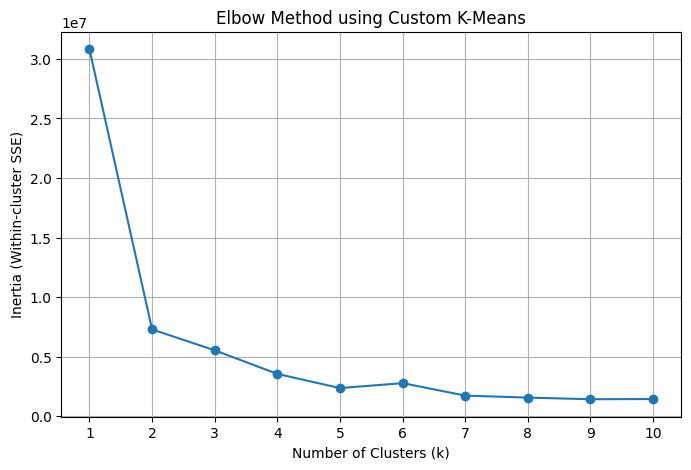

In [ ]:
import matplotlib.pyplot as plt
X=data
inertias = []
k_range = range(1, 11)

for k in k_range:
    _, _, inertia = kmeans(X, k)
    inertias.append(inertia)

# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o')
plt.title("Elbow Method using Custom K-Means")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-cluster SSE)")
plt.grid(True)
plt.xticks(k_range)
plt.show()

In [ ]:
labels = kmeans(data, k=2)

In [ ]:
labels[0]

array([0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 0.

In [ ]:
from sklearn.metrics import silhouette_score

# Assuming 'data' and 'labels' are already defined from your kmeans function
score = silhouette_score(data, labels[0])
print("Silhouette score:", score)


Silhouette score: 0.6735098638013705
